### **Soil Moisture & Rainfall Data Analysis (SENTINEL-PAGASA BUCAF AWS-Project SARAi)**

##### _**Import dependencies**_

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

##### _**show bar graph values function**_

In [2]:
# function for showing values for each bar in bar plots
def show_values_on_bars(axs, orient='v',space=0, num=2):
    def _show_on_single_plot(ax):  
        if orient == 'v':
            for p in ax.patches:
                if num == 4:
                    _x = p.get_x() + p.get_width() / 2
                    _y = p.get_y() + p.get_height() + space
                    value = '{:.4f}'.format(p.get_height())
                    ax.text(_x, _y, value, ha="center")
                if num == 2:
                    _x = p.get_x() + p.get_width() / 2
                    _y = p.get_y() + p.get_height() + space
                    value = '{:.2f}'.format(p.get_height())
                    ax.text(_x, _y, value, ha="center")
                else:
                    _x = p.get_x() + p.get_width() / 2
                    _y = p.get_y() + p.get_height() + space
                    value = '{:.0f}'.format(p.get_height())
                    ax.text(_x, _y, value, ha="center")
        if orient == 'h':
            for p in ax.patches:
                if num == 4:
                    _x = p.get_x() + p.get_width() + float(space)
                    _y = p.get_y() + p.get_height() / 2
                    value = '{:.4f}'.format(p.get_width())
                    ax.text(_x, _y, value, ha="left")
                else:
                    _x = p.get_x() + p.get_width() + float(space)
                    _y = p.get_y() + p.get_height() / 2
                    value = '{:.2f}'.format(p.get_width())
                    ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

### _**SENTINEL (Experimental dataset)**_

##### _**Yearly Average / Total**_

In [20]:
sentinel = pd.read_csv('data/SENTINEL.csv')
sentinel.Date = pd.to_datetime(sentinel.Date, yearfirst=True)
sentinel_yearly = sentinel.groupby([sentinel.Year, sentinel.Brgy]).agg(['mean','sum'])
#yearly.to_csv('sentinel_yearly.csv')

##### _**Monthly Average/Total**_

In [22]:
sentinel['id'] = sentinel.Date.dt.month
sentinel_monthly = sentinel.groupby([sentinel.Date.dt.strftime('%b'),sentinel.Brgy]).agg(['mean','sum']).drop(labels='Year', axis=1)
sentinel_monthly = sentinel_monthly.sort_values(by=[('id','mean'),'Brgy'])
sentinel_monthly = sentinel_monthly.drop(columns=[('id','sum')],axis=1)
#monthly.to_csv('sentinel_monthly.csv')


##### _**Overall Average per Brgy**_

In [16]:
sentinel_avg_brgy = sentinel.drop(labels=['Year','id'], axis=1).groupby(sentinel.Brgy).mean().reset_index()
#avg_brgy.to_csv('sentinel_avg_brgy.csv', index=False)

##### _**Monthly average of Brgy per year**_

In [26]:
sentinel_avg_brgy_monthly_year = sentinel.groupby([sentinel.Date.dt.year, sentinel.Date.dt.strftime('%b'), sentinel.Brgy]).mean().drop(labels='Year',axis=1)
#avg_brgy_monthly_year = sentinel_avg_brgy_monthly_year.sort_values(by=['Year', 'id'])
#avg_brgy_monthly_year = avg_brgy_monthly_year.rename_axis(index={'Date':'year', 'Date':'month'})
#avg_brgy_monthly_year.to_csv('SENTINEL_brgy_monthly_year.csv')

### _**PAGASA BUCAF AWS (Validation dataset)**_

In [27]:
aws = pd.read_csv('data/AWS.csv')
aws.rename(
    columns={'DATE':'date','RAINFALL':'rain'},
    inplace=True
)
aws.rain = aws.rain.str.replace('T','0.025')
aws.rain = pd.to_numeric(aws.rain, errors='coerce')
aws.date = pd.to_datetime(aws.date, format='%d/%m/%Y')
#df_aws.to_csv('aws_set.csv', index=False)
#df_aws

In [33]:
aws_yearly_avg = aws.groupby([aws.date.dt.year]).mean().reset_index()
aws_monthly_avg = aws.groupby([aws.date.dt.month]).mean().reset_index()
aws_monthly_avg.date = pd.Series(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

In [36]:
aws_yearly_total = aws.groupby([aws.date.dt.year]).sum().reset_index()
aws_monthly_total = aws.groupby([aws.date.dt.month]).sum().reset_index()
aws_monthly_total.date = pd.Series(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

##### _**Monthly Average+Total**_

In [38]:
aws_monthly = pd.merge(aws_monthly_avg, aws_monthly_total,on="date")
aws_monthly.rename(
    columns={'rain_x':'avg','rain_y':'total'},inplace=True
)
#aws_monthly.to_csv('aws_monthly.csv',index=False)

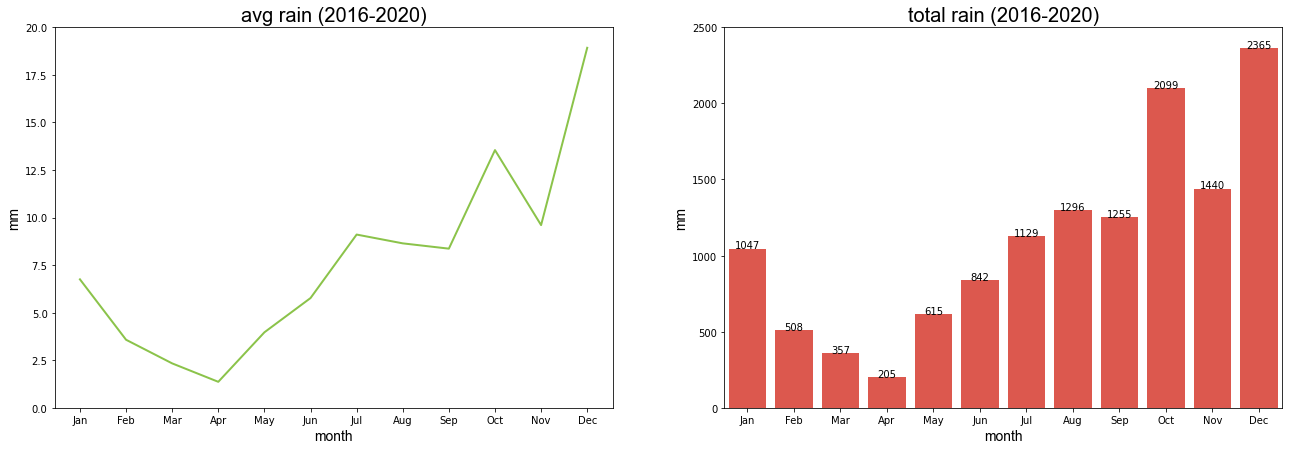

In [41]:
# set a figure and 2 axes for plotting
fig, axs = plt.subplots(ncols=2,figsize=(22,7))

# avg rain
ax1 = sns.lineplot(x='date', y='avg', data=aws_monthly, color='#8BC34A', linewidth=2, ax=axs[0])
axs[0].set_title('avg rain (2016-2020)', fontdict={'fontsize':20,'fontname':'Arial'})
axs[0].set_xlabel('month', fontdict={'fontsize':14,'fontname':'Arial'})
axs[0].set_yticks(np.arange(0,22.5,2.5))
axs[0].set_ylabel('mm', fontdict={'fontsize':14,'fontname':'Arial'})
axs[0].tick_params(axis='both', labelsize=10)

# total rain
ax2 = sns.barplot(x='date', y='total', data=aws_monthly, color='#F44336', linewidth=2, ax=axs[1])
axs[1].set_title('total rain (2016-2020)', fontdict={'fontsize':20,'fontname':'Arial'})
axs[1].set_xlabel('month', fontdict={'fontsize':14,'fontname':'Arial'})
axs[1].set_yticks(np.arange(0,3000,500))
axs[1].set_ylabel('mm', fontdict={'fontsize':14,'fontname':'Arial'})
axs[1].tick_params(axis='both', labelsize=10)
show_values_on_bars(axs[1], orient='v', num=1)

plt.show()

##### _**Yearly Average+Total**_

In [40]:
aws_yearly = pd.merge(aws_yearly_avg,aws_yearly_total, on='date')
aws_yearly.rename(
    columns={'rain_x':'avg','rain_y':'total'},inplace=True
)
#aws_yearly.to_csv('aws_yearly.csv',index=False)

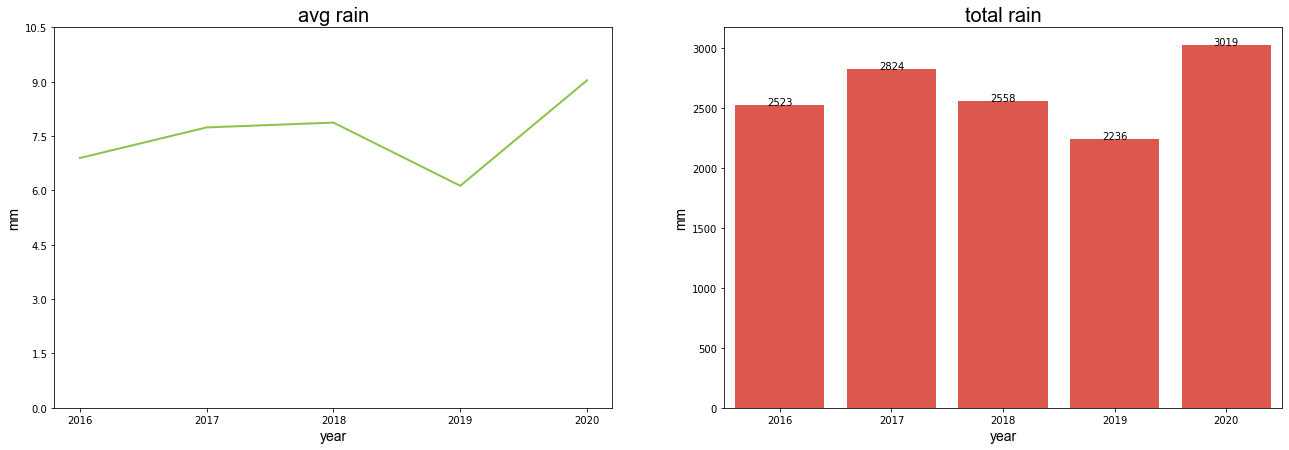

In [42]:
# set a figure and 2 axes for plotting
fig, axs = plt.subplots(ncols=2,figsize=(22,7))

# avg rain
ax3 = sns.lineplot(x='date', y='avg', data=aws_yearly, color='#8BC34A', linewidth=2, ax=axs[0])
axs[0].set_title('avg rain', fontdict={'fontsize':20,'fontname':'Arial'})
axs[0].set_xlabel('year', fontdict={'fontsize':14,'fontname':'Arial'})
axs[0].set_xticks(np.arange(2016,2021,1))
axs[0].set_yticks(np.arange(0,11,1.5))
axs[0].set_ylabel('mm', fontdict={'fontsize':14,'fontname':'Arial'})
axs[0].tick_params(axis='both', labelsize=10)

# total rain
ax4 = sns.barplot(x='date', y='total', data=aws_yearly, color='#F44336', linewidth=2, ax=axs[1])
axs[1].set_title('total rain', fontdict={'fontsize':20,'fontname':'Arial'})
axs[1].set_xlabel('year', fontdict={'fontsize':14,'fontname':'Arial'})
#axs[1].set_yticks(np.arange(0,3000,500))
axs[1].set_ylabel('mm', fontdict={'fontsize':14,'fontname':'Arial'})
axs[1].tick_params(axis='both', labelsize=10)
show_values_on_bars(axs[1], orient='v', num=1)

plt.show()

### _**Project SARAi (Comparison dataset)**_

In [43]:
# list columns for use
columns = ['Date', 'Time', 'Rain', 'Rain Rate', 'Soil 1 Moist', 'Soil 2 Moist', 'Soil 3 Moist', 'Soil 4 Moist']

# read data & remove column name with trailing spaces/replace with _
sarai = pd.read_csv('data/SARAI_BUCAF_2016-2020_as_of_12162020.csv', usecols=columns)
sarai.columns = sarai.columns.str.rstrip().str.replace(' ', '_')
sarai.rename(
    columns={'Rain':'Rain_Rate','Rain_Rate':'Rain'},
    inplace=True
)
sarai.head()

c:\Users\zyrvs\Desktop\thesis_output\venv\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (34,35,36,37) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Date,Time,Rain_Rate,Rain,Soil_1_Moist,Soil_2_Moist,Soil_3_Moist,Soil_4_Moist
0,04/21/16,11:00 AM,0.00,0.0,---,---,---,---
1,04/21/16,11:15 AM,0.25,0.0,---,---,---,---
2,04/21/16,11:30 AM,0.00,0.0,---,---,---,---
3,04/21/16,11:45 AM,0.00,0.0,---,---,---,---
4,04/21/16,12:00 PM,0.00,0.0,---,---,---,---


In [45]:
# change date column to datetime object
sarai['Date'] = pd.to_datetime(sarai['Date'], yearfirst=True)

# filter year to 2020 and reassign to dataframe
#df = df[df['Date'].dt.year == 2020]

# copy reading df to working df to avoid SettingWithCopyWarning Error
#df1620 = df.copy()

# change soil object to the proper data type, fill parsing errors with NaN values
sarai['Soil_1_Moist'] = pd.to_numeric(sarai.Soil_1_Moist, errors='coerce')
sarai['Soil_2_Moist'] = pd.to_numeric(sarai.Soil_2_Moist, errors='coerce')
sarai['Soil_3_Moist'] = pd.to_numeric(sarai.Soil_3_Moist, errors='coerce')
sarai['Soil_4_Moist'] = pd.to_numeric(sarai.Soil_4_Moist, errors='coerce')

##### _**per day DataFrame**_

In [46]:
sarai_per_day = sarai.groupby(sarai.Date.dt.strftime('%m-%d-%Y')).mean().reset_index()
sarai_per_day.Date = pd.to_datetime(sarai_per_day.Date, yearfirst=True)
sarai_per_day = sarai_per_day.sort_values(by='Date').reset_index()
sarai_per_day.drop('index', axis=1, inplace=True)
sarai_per_day['Year'] = sarai_per_day.Date.dt.year
sarai_per_day['Month'] = sarai_per_day.Date.dt.strftime('%b')
sarai_per_day

,Date,Rain_Rate,Rain,Soil_1_Moist,Soil_2_Moist,Soil_3_Moist,Soil_4_Moist,Year,Month
0,2016-04-21,0.004808,0.000000,NaN,NaN,NaN,NaN,2016,Apr
1,2016-04-22,0.000000,0.000000,NaN,NaN,NaN,NaN,2016,Apr
2,2016-04-23,0.000000,0.000000,NaN,NaN,NaN,NaN,2016,Apr
3,2016-04-24,0.000000,0.000000,NaN,NaN,NaN,NaN,2016,Apr
4,2016-04-25,0.000000,0.000000,NaN,NaN,NaN,NaN,2016,Apr
...,...,...,...,...,...,...,...,...,...
1400,2020-12-12,0.000000,0.000000,0.0,0.0,0.0,33.023810,2020,Dec
1401,2020-12-13,0.002604,0.000000,0.0,0.0,0.0,36.850000,2020,Dec
1402,2020-12-14,0.013229,0.153125,0.0,0.0,0.0,41.878049,2020,Dec
1403,2020-12-15,0.005208,0.000000,0.0,0.0,0.0,46.657143,2020,Dec


##### _**Avg yearly-monthly**_

In [49]:
# groupby month and aggregate by the mean/reset index to make the date as a column
sarai_monthly_avg = sarai.groupby(sarai.Date.dt.month).mean().reset_index()
sarai_monthly_avg.Date = pd.Series(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
sarai_yearly_avg = sarai.groupby(sarai.Date.dt.year).mean().reset_index()

##### _**Total yearly-monthly**_

In [56]:
# groupby month and aggregate by the sum/reset index to make the date as a column
sarai_monthly_total = sarai.groupby(sarai.Date.dt.month).sum().reset_index()
sarai_monthly_total.Date = pd.Series(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
sarai_yearly_total = sarai.groupby(sarai.Date.dt.year).sum().reset_index()

In [58]:
# SARAi-month

sarai_month = pd.merge(sarai_monthly_avg, sarai_monthly_total,on="Date")
sarai_month.rename(
    columns={'Rain_Rate_x':'rain_rate_avg', 'Rain_x':'rain_avg', 'Soil_1_Moist_x':'soil1_moist_avg',
    'Soil_2_Moist_x':'soil2_moist_avg', 'Soil_3_Moist_x':'soil3_moist_avg', 'Soil_4_Moist_x':'soil4_moist_avg',
    'Rain_Rate_y':'rain_rate_total', 'Rain_y':'rain_total', 'Soil_1_Moist_y':'soil1_moist_total',
    'Soil_2_Moist_y':'soil2_moist_total', 'Soil_3_Moist_y':'soil3_moist_total', 'Soil_4_Moist_y':'soil4_moist_total'
    },inplace=True
)
sarai_month = sarai_month.round({"rain_rate_avg":2, "rain_avg":2, "soil1_moist_avg":2, "soil2_moist_avg":2, "soil3_moist_avg":2,
"soil4_moist_avg":2, "rain_rate_total":0, "rain_total":0, "soil1_moist_total":0, "soil2_moist_total":0, "soil3_moist_total":0,
"soil4_moist_total":0})
#sarai_month.to_csv('SARAi_month.csv', index=False)

In [60]:
# SARAi-year

sarai_year = pd.merge(sarai_yearly_avg, sarai_yearly_total, on='Date')
sarai_year.rename(
    columns={'Rain_Rate_x':'rain_rate_avg', 'Rain_x':'rain_avg', 'Soil_1_Moist_x':'soil1_moist_avg',
    'Soil_2_Moist_x':'soil2_moist_avg', 'Soil_3_Moist_x':'soil3_moist_avg', 'Soil_4_Moist_x':'soil4_moist_avg',
    'Rain_Rate_y':'rain_rate_total', 'Rain_y':'rain_total', 'Soil_1_Moist_y':'soil1_moist_total',
    'Soil_2_Moist_y':'soil2_moist_total', 'Soil_3_Moist_y':'soil3_moist_total', 'Soil_4_Moist_y':'soil4_moist_total'
    },inplace=True
)
sarai_year = sarai_year.round({"rain_rate_avg":2, "rain_avg":2, "soil1_moist_avg":2, "soil2_moist_avg":2, "soil3_moist_avg":2,
"soil4_moist_avg":2, "rain_rate_total":0, "rain_total":0, "soil1_moist_total":0, "soil2_moist_total":0, "soil3_moist_total":0,
"soil4_moist_total":0})
#df_sarai_year.to_csv('SARAi_year.csv', index=False)

In [64]:
# add year and month column for hue parameter in regression plots
sarai['Year'] = sarai.Date.dt.year
sarai['Month'] = sarai.Date.dt.strftime('%b')

##### _**Visualización**_

##### _**Avg rain vs rain rate (month)**_

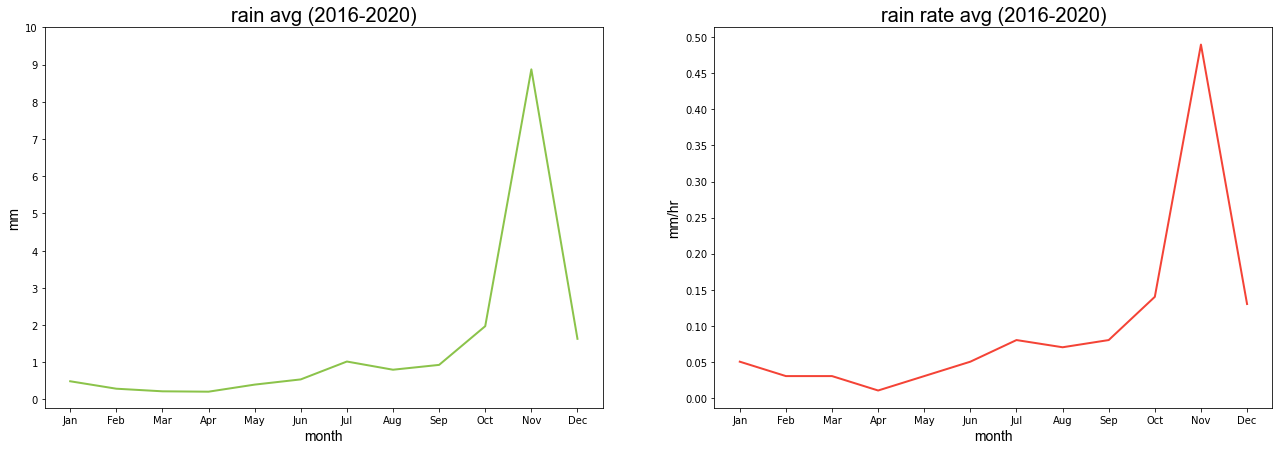

In [65]:
# set a figure and 2 axes for plotting
fig, axs = plt.subplots(ncols=2,figsize=(22,7))

# avg rain
ax1 = sns.lineplot(x='Date', y='rain_avg', data=sarai_month, color='#8BC34A', linewidth=2, ax=axs[0])
axs[0].set_title('rain avg (2016-2020)', fontdict={'fontsize':20,'fontname':'Arial'})
axs[0].set_xlabel('month', fontdict={'fontsize':14,'fontname':'Arial'})
axs[0].set_yticks(np.arange(0,11,1))
axs[0].set_ylabel('mm', fontdict={'fontsize':14,'fontname':'Arial'})
axs[0].tick_params(axis='both', labelsize=10)

# avg rain rate
ax2 = sns.lineplot(x='Date', y='rain_rate_avg', data=sarai_month, color='#F44336', linewidth=2, ax=axs[1])
axs[1].set_title('rain rate avg (2016-2020)', fontdict={'fontsize':20,'fontname':'Arial'})
axs[1].set_xlabel('month', fontdict={'fontsize':14,'fontname':'Arial'})
axs[1].set_yticks(np.arange(0,0.55,0.05))
axs[1].set_ylabel('mm/hr', fontdict={'fontsize':14,'fontname':'Arial'})
axs[1].tick_params(axis='both', labelsize=10)

plt.show()

##### _**Total rain (month)**_

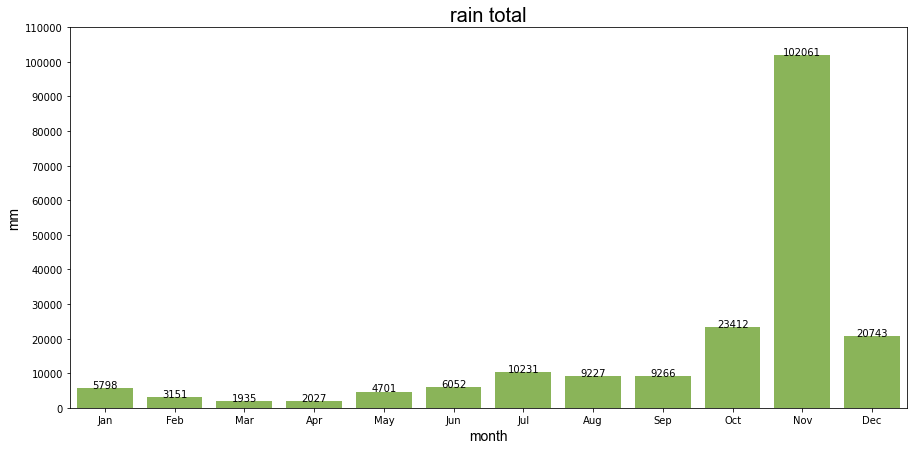

In [66]:
# set a figure and 2 axes for plotting
fig, axs = plt.subplots(figsize=(15,7))

# total rain
ax = sns.barplot(x='Date', y='rain_total', data=sarai_month, color='#8BC34A', ax=axs)
ax.set_title('rain total', fontdict={'fontsize':20,'fontname':'Arial'})
ax.set_xlabel('month', fontdict={'fontsize':14,'fontname':'Arial'})
ax.set_yticks(np.arange(0,120000,10000))
ax.set_ylabel('mm', fontdict={'fontsize':14,'fontname':'Arial'})
ax.tick_params(axis='both', labelsize=10)
show_values_on_bars(axs, orient='v', num=0)

plt.show()

##### _**Avg rain vs rain rate (year)**_

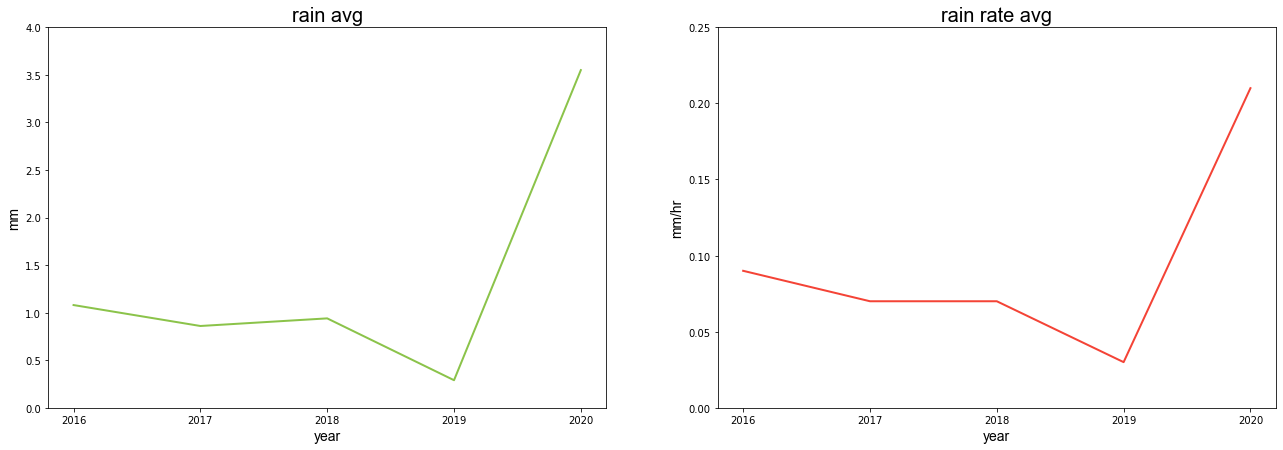

In [67]:
# set a figure and 2 axes for plotting
fig, axs = plt.subplots(ncols=2,figsize=(22,7))

# avg rain
ax1 = sns.lineplot(x='Date', y='rain_avg', data=sarai_year, color='#8BC34A', linewidth=2, ax=axs[0])
axs[0].set_title('rain avg', fontdict={'fontsize':20,'fontname':'Arial'})
axs[0].set_xlabel('year', fontdict={'fontsize':14,'fontname':'Arial'})
axs[0].set_xticks(np.arange(2016,2021,1))
axs[0].set_yticks(np.arange(0,4.5,0.5))
axs[0].set_ylabel('mm', fontdict={'fontsize':14,'fontname':'Arial'})
axs[0].tick_params(axis='both', labelsize=10)

# avg rain rate
ax2 = sns.lineplot(x='Date', y='rain_rate_avg', data=sarai_year, color='#F44336', linewidth=2, ax=axs[1])
axs[1].set_title('rain rate avg', fontdict={'fontsize':20,'fontname':'Arial'})
axs[1].set_xlabel('year', fontdict={'fontsize':14,'fontname':'Arial'})
axs[1].set_xticks(np.arange(2016,2021,1))
axs[1].set_yticks(np.arange(0,0.3,0.05))
axs[1].set_ylabel('mm/hr', fontdict={'fontsize':14,'fontname':'Arial'})
axs[1].tick_params(axis='both', labelsize=10)

plt.show()

##### _**Total rain (year)**_

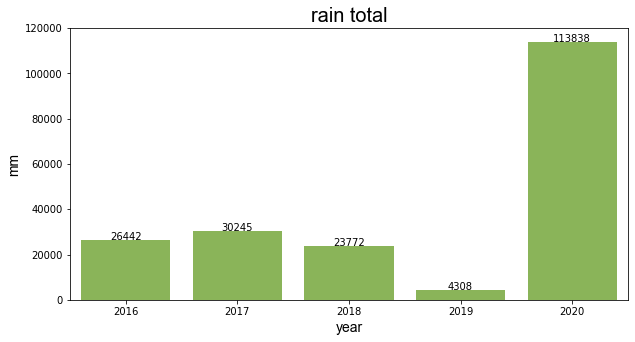

In [68]:
# set a figure and 2 axes for plotting
fig, axs = plt.subplots(figsize=(10,5))

# total rain
ax = sns.barplot(x='Date', y='rain_total', data=sarai_year, color='#8BC34A', ax=axs)
ax.set_title('rain total', fontdict={'fontsize':20,'fontname':'Arial'})
ax.set_xlabel('year', fontdict={'fontsize':14,'fontname':'Arial'})
ax.set_yticks(np.arange(0,140000,20000))
ax.set_ylabel('mm', fontdict={'fontsize':14,'fontname':'Arial'})
ax.tick_params(axis='both', labelsize=10)
show_values_on_bars(axs, orient='v',num=0)

plt.show()

##### _**Avg soil 1-4 moisture (month)**_

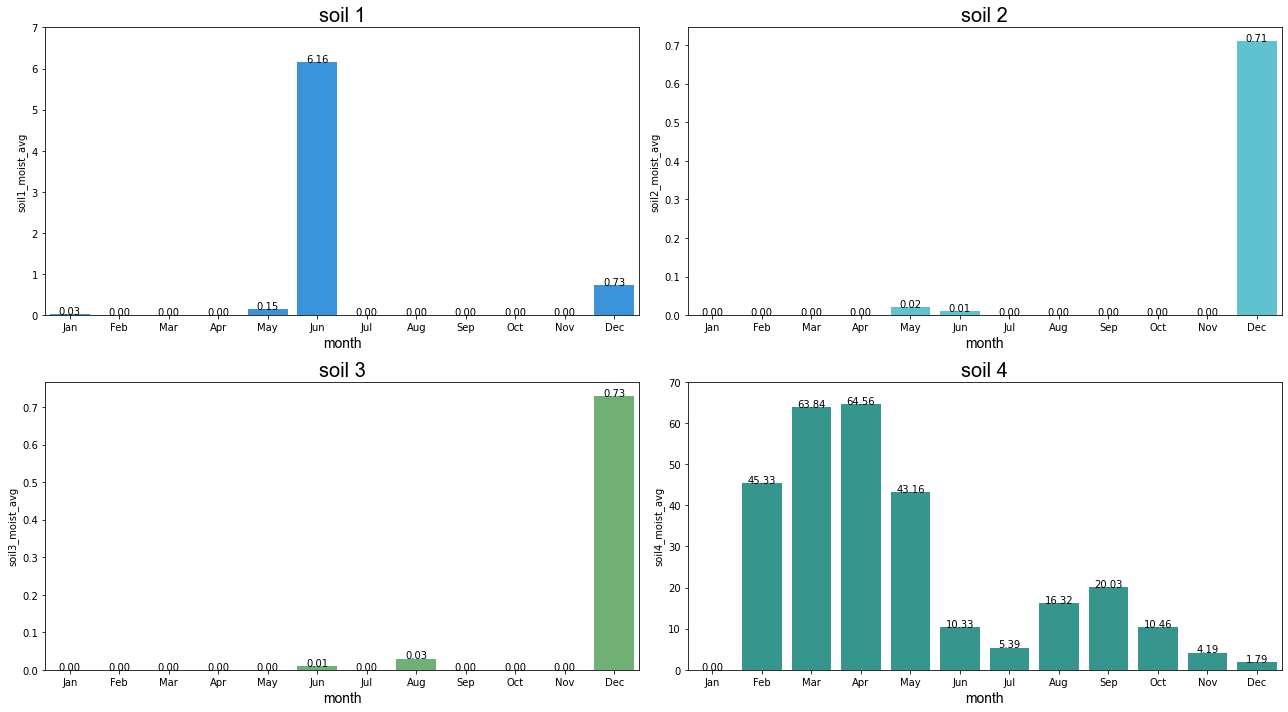

In [69]:
fig, axs = plt.subplots(2,2,figsize=(18,10))

# soil_1
axs1 = sns.barplot(x='Date', y='soil1_moist_avg', data=sarai_month, color='#2196F3', ax=axs[0,0])
axs[0,0].set_title('soil 1', fontdict={'fontsize':20,'fontname':'Arial'})
axs[0,0].set_xlabel('month', fontdict={'fontsize':14,'fontname':'Arial'})
axs[0,0].set_yticks(np.arange(0,8,1))
#axs[0,0].set_ylabel('cm3/cm3', fontdict={'fontsize':14,'fontname':'Arial'})
axs[0,0].tick_params(axis='both', labelsize=10)
#show_values(ax1, orient='v', space=.02)
show_values_on_bars(axs[0,0], num=2)

# soil_2
axs2 = sns.barplot(x='Date', y='soil2_moist_avg', data=sarai_month, color='#4DD0E1', ax=axs[0,1])
axs[0,1].set_title('soil 2', fontdict={'fontsize':20,'fontname':'Arial'})
axs[0,1].set_xlabel('month', fontdict={'fontsize':14,'fontname':'Arial'})
axs[0,1].set_yticks(np.arange(0,0.8,0.1))
#axs[0,1].set_ylabel('cm3/cm3', fontdict={'fontsize':14,'fontname':'Arial'})
axs[0,1].tick_params(axis='both', labelsize=10)
#show_values(axs1, orient='v', space=.02)
show_values_on_bars(axs[0,1], num=2)

# soil_3
axs3 = sns.barplot(x='Date', y='soil3_moist_avg', data=sarai_month, color='#66BB6A', ax=axs[1,0])
axs[1,0].set_title('soil 3', fontdict={'fontsize':20,'fontname':'Arial'})
axs[1,0].set_xlabel('month', fontdict={'fontsize':14,'fontname':'Arial'})
#axs[1,0].set_yticks(np.arange(0,0.1,0.025))
#axs[1,0].set_ylabel('cm3/cm3', fontdict={'fontsize':14,'fontname':'Arial'})
axs[1,0].tick_params(axis='both', labelsize=10)
#show_values(ax1, orient='v', space=.02)
show_values_on_bars(axs[1,0], num=2)

# soil_4
axs4 = sns.barplot(x='Date', y='soil4_moist_avg', data=sarai_month, color='#26A69A', ax=axs[1,1])
axs[1,1].set_title('soil 4', fontdict={'fontsize':20,'fontname':'Arial'})
axs[1,1].set_xlabel('month', fontdict={'fontsize':14,'fontname':'Arial'})
axs[1,1].set_yticks(np.arange(0,80,10))
#axs[1,1].set_ylabel('cm3/cm3', fontdict={'fontsize':14,'fontname':'Arial'})
axs[1,1].tick_params(axis='both', labelsize=10)
show_values_on_bars(axs[1,1], num=2)

fig.tight_layout()
plt.show()

##### _**Total soil 1-4 moisture (month)**_

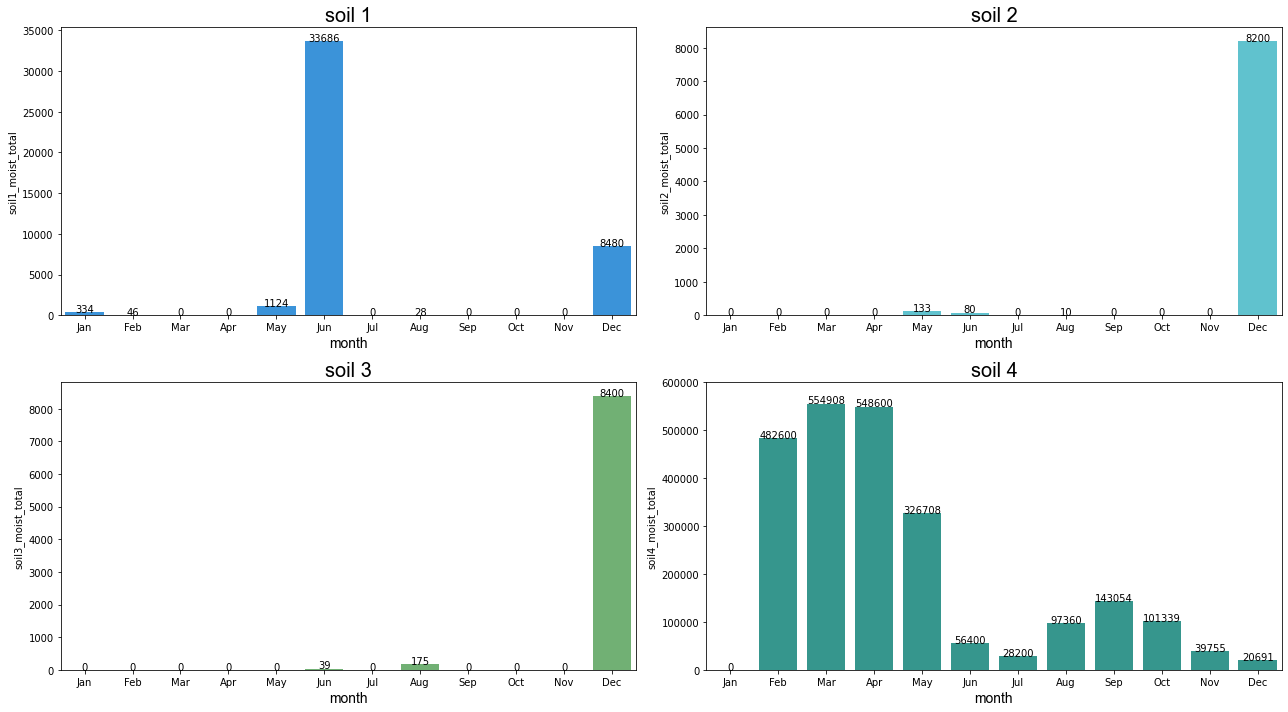

In [70]:
fig, axs = plt.subplots(2,2,figsize=(18,10))

# soil_1
axs1 = sns.barplot(x='Date', y='soil1_moist_total', data=sarai_month, color='#2196F3', ax=axs[0,0])
axs[0,0].set_title('soil 1', fontdict={'fontsize':20,'fontname':'Arial'})
axs[0,0].set_xlabel('month', fontdict={'fontsize':14,'fontname':'Arial'})
#axs[0,0].set_yticks(np.arange(0,8,1))
#axs[0,0].set_ylabel('cm3/cm3', fontdict={'fontsize':14,'fontname':'Arial'})
axs[0,0].tick_params(axis='both', labelsize=10)
show_values_on_bars(axs[0,0], num=0)

# soil_2
axs2 = sns.barplot(x='Date', y='soil2_moist_total', data=sarai_month, color='#4DD0E1', ax=axs[0,1])
axs[0,1].set_title('soil 2', fontdict={'fontsize':20,'fontname':'Arial'})
axs[0,1].set_xlabel('month', fontdict={'fontsize':14,'fontname':'Arial'})
#axs[0,1].set_yticks(np.arange(0,0.8,0.1))
#axs[0,1].set_ylabel('cm3/cm3', fontdict={'fontsize':14,'fontname':'Arial'})
axs[0,1].tick_params(axis='both', labelsize=10)
show_values_on_bars(axs[0,1], num=0)

# soil_3
axs3 = sns.barplot(x='Date', y='soil3_moist_total', data=sarai_month, color='#66BB6A', ax=axs[1,0])
axs[1,0].set_title('soil 3', fontdict={'fontsize':20,'fontname':'Arial'})
axs[1,0].set_xlabel('month', fontdict={'fontsize':14,'fontname':'Arial'})
#axs[1,0].set_yticks(np.arange(0,0.1,0.025))
#axs[1,0].set_ylabel('cm3/cm3', fontdict={'fontsize':14,'fontname':'Arial'})
axs[1,0].tick_params(axis='both', labelsize=10)
show_values_on_bars(axs[1,0], num=0)

# soil_4
axs4 = sns.barplot(x='Date', y='soil4_moist_total', data=sarai_month, color='#26A69A', ax=axs[1,1])
axs[1,1].set_title('soil 4', fontdict={'fontsize':20,'fontname':'Arial'})
axs[1,1].set_xlabel('month', fontdict={'fontsize':14,'fontname':'Arial'})
axs[1,1].set_yticks(np.arange(0,700000,100000))
#axs[1,1].set_ylabel('cm3/cm3', fontdict={'fontsize':14,'fontname':'Arial'})
axs[1,1].tick_params(axis='both', labelsize=10)
show_values_on_bars(axs[1,1], num=0)

fig.tight_layout()
plt.show()

##### _**Avg soil 1-4 moisture (year)**_

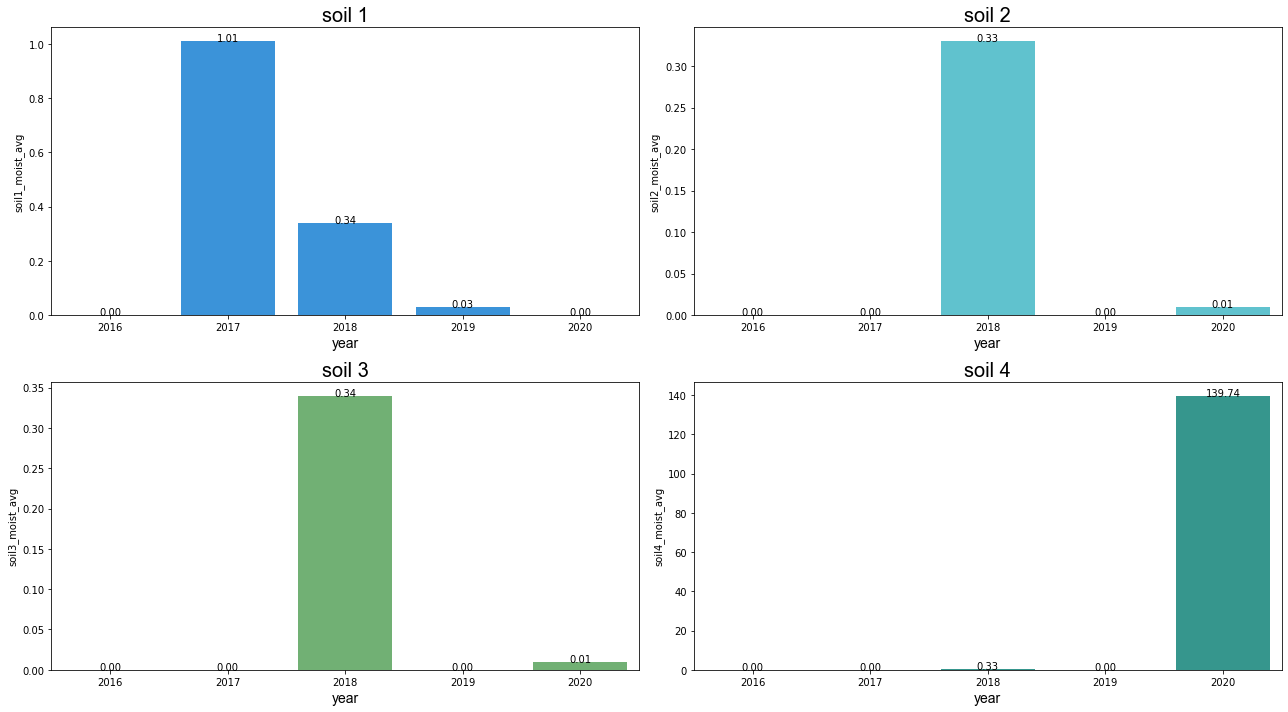

In [71]:
fig, axs = plt.subplots(2,2,figsize=(18,10))

# soil_1
axs1 = sns.barplot(x='Date', y='soil1_moist_avg', data=sarai_year, color='#2196F3', ax=axs[0,0])
axs[0,0].set_title('soil 1', fontdict={'fontsize':20,'fontname':'Arial'})
axs[0,0].set_xlabel('year', fontdict={'fontsize':14,'fontname':'Arial'})
#axs[0,0].set_yticks(np.arange(0,8,1))
#axs[0,0].set_ylabel('cm3/cm3', fontdict={'fontsize':14,'fontname':'Arial'})
axs[0,0].tick_params(axis='both', labelsize=10)
#show_values(ax1, orient='v', space=.02)
show_values_on_bars(axs[0,0], num=2)

# soil_2
axs2 = sns.barplot(x='Date', y='soil2_moist_avg', data=sarai_year, color='#4DD0E1', ax=axs[0,1])
axs[0,1].set_title('soil 2', fontdict={'fontsize':20,'fontname':'Arial'})
axs[0,1].set_xlabel('year', fontdict={'fontsize':14,'fontname':'Arial'})
#axs[0,1].set_yticks(np.arange(0,0.8,0.1))
#axs[0,1].set_ylabel('cm3/cm3', fontdict={'fontsize':14,'fontname':'Arial'})
axs[0,1].tick_params(axis='both', labelsize=10)
#show_values(axs1, orient='v', space=.02)
show_values_on_bars(axs[0,1], num=2)

# soil_3
axs3 = sns.barplot(x='Date', y='soil3_moist_avg', data=sarai_year, color='#66BB6A', ax=axs[1,0])
axs[1,0].set_title('soil 3', fontdict={'fontsize':20,'fontname':'Arial'})
axs[1,0].set_xlabel('year', fontdict={'fontsize':14,'fontname':'Arial'})
#axs[1,0].set_yticks(np.arange(0,0.1,0.025))
#axs[1,0].set_ylabel('cm3/cm3', fontdict={'fontsize':14,'fontname':'Arial'})
axs[1,0].tick_params(axis='both', labelsize=10)
#show_values(ax1, orient='v', space=.02)
show_values_on_bars(axs[1,0], num=2)

# soil_4
axs4 = sns.barplot(x='Date', y='soil4_moist_avg', data=sarai_year, color='#26A69A', ax=axs[1,1])
axs[1,1].set_title('soil 4', fontdict={'fontsize':20,'fontname':'Arial'})
axs[1,1].set_xlabel('year', fontdict={'fontsize':14,'fontname':'Arial'})
#axs[1,1].set_yticks(np.arange(0,80,10))
#axs[1,1].set_ylabel('cm3/cm3', fontdict={'fontsize':14,'fontname':'Arial'})
axs[1,1].tick_params(axis='both', labelsize=10)
show_values_on_bars(axs[1,1], num=2)

fig.tight_layout()
plt.show()

##### _**Total soil 1-4 moisture (year)**_

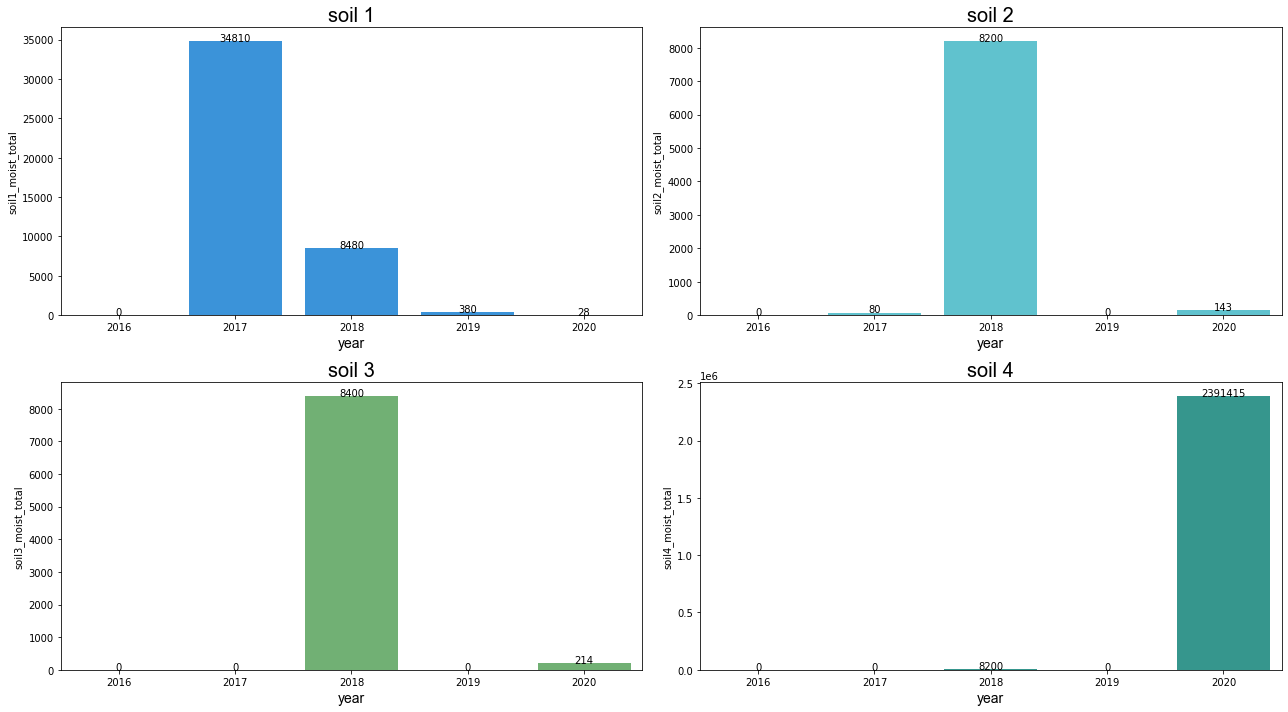

In [72]:
fig, axs = plt.subplots(2,2,figsize=(18,10))

# soil_1
axs1 = sns.barplot(x='Date', y='soil1_moist_total', data=sarai_year, color='#2196F3', ax=axs[0,0])
axs[0,0].set_title('soil 1', fontdict={'fontsize':20,'fontname':'Arial'})
axs[0,0].set_xlabel('year', fontdict={'fontsize':14,'fontname':'Arial'})
#axs[0,0].set_yticks(np.arange(0,8,1))
#axs[0,0].set_ylabel('cm3/cm3', fontdict={'fontsize':14,'fontname':'Arial'})
axs[0,0].tick_params(axis='both', labelsize=10)
show_values_on_bars(axs[0,0], num=0)

# soil_2
axs2 = sns.barplot(x='Date', y='soil2_moist_total', data=sarai_year, color='#4DD0E1', ax=axs[0,1])
axs[0,1].set_title('soil 2', fontdict={'fontsize':20,'fontname':'Arial'})
axs[0,1].set_xlabel('year', fontdict={'fontsize':14,'fontname':'Arial'})
#axs[0,1].set_yticks(np.arange(0,0.8,0.1))
#axs[0,1].set_ylabel('cm3/cm3', fontdict={'fontsize':14,'fontname':'Arial'})
axs[0,1].tick_params(axis='both', labelsize=10)
show_values_on_bars(axs[0,1], num=0)

# soil_3
axs3 = sns.barplot(x='Date', y='soil3_moist_total', data=sarai_year, color='#66BB6A', ax=axs[1,0])
axs[1,0].set_title('soil 3', fontdict={'fontsize':20,'fontname':'Arial'})
axs[1,0].set_xlabel('year', fontdict={'fontsize':14,'fontname':'Arial'})
#axs[1,0].set_yticks(np.arange(0,0.1,0.025))
#axs[1,0].set_ylabel('cm3/cm3', fontdict={'fontsize':14,'fontname':'Arial'})
axs[1,0].tick_params(axis='both', labelsize=10)
show_values_on_bars(axs[1,0], num=0)

# soil_4
axs4 = sns.barplot(x='Date', y='soil4_moist_total', data=sarai_year, color='#26A69A', ax=axs[1,1])
axs[1,1].set_title('soil 4', fontdict={'fontsize':20,'fontname':'Arial'})
axs[1,1].set_xlabel('year', fontdict={'fontsize':14,'fontname':'Arial'})
#axs[1,1].set_yticks(np.arange(0,700000,100000))
#axs[1,1].set_ylabel('cm3/cm3', fontdict={'fontsize':14,'fontname':'Arial'})
axs[1,1].tick_params(axis='both', labelsize=10)
show_values_on_bars(axs[1,1], num=0)

fig.tight_layout()
plt.show()

### _**Regression**_

##### _**SENTINEL-AWS**_

In [73]:
reg_sent_aws = sentinel.groupby([sentinel.Date.dt.strftime('%Y-%m-%d')]).mean().reset_index()
reg_sent_aws.rename(
    columns={'Date':'date'},inplace=True
)
reg_sent_aws.date = pd.to_datetime(reg_sent_aws.date, format='%Y-%m-%d')
sm_aws = pd.merge(reg_sent_aws, aws, how='outer', on=['date']).dropna(axis=0,how='any')

In [74]:
merge16 = sm_aws[sm_aws.Year == 2016].drop(labels=['id'],axis=1)
merge17 = sm_aws[sm_aws.Year == 2017].drop(labels=['id'],axis=1)
merge18 = sm_aws[sm_aws.Year == 2018].drop(labels=['id'],axis=1)
merge19 = sm_aws[sm_aws.Year == 2019].drop(labels=['id'],axis=1)
merge20 = sm_aws[sm_aws.Year == 2020].drop(labels=['id'],axis=1)

merge16['id'] = merge16.date.dt.strftime('%b')
merge17['id'] = merge17.date.dt.strftime('%b')
merge18['id'] = merge18.date.dt.strftime('%b')
merge19['id'] = merge19.date.dt.strftime('%b')
merge20['id'] = merge20.date.dt.strftime('%b')

In [75]:
print('2016: ',np.corrcoef(x=merge16.Soil_Moisture, y=merge16.rain)[0][1])
print('2017: ',np.corrcoef(x=merge17.Soil_Moisture, y=merge17.rain)[0][1])
print('2018: ',np.corrcoef(x=merge18.Soil_Moisture, y=merge18.rain)[0][1])
print('2019: ',np.corrcoef(x=merge19.Soil_Moisture, y=merge19.rain)[0][1])
print('2020: ',np.corrcoef(x=merge20.Soil_Moisture, y=merge20.rain)[0][1])

2016:  0.39112593997594014
2017:  0.26458261160352703
2018:  0.25807455950557534
2019:  0.3392543657040291
2020:  0.23495413511966784


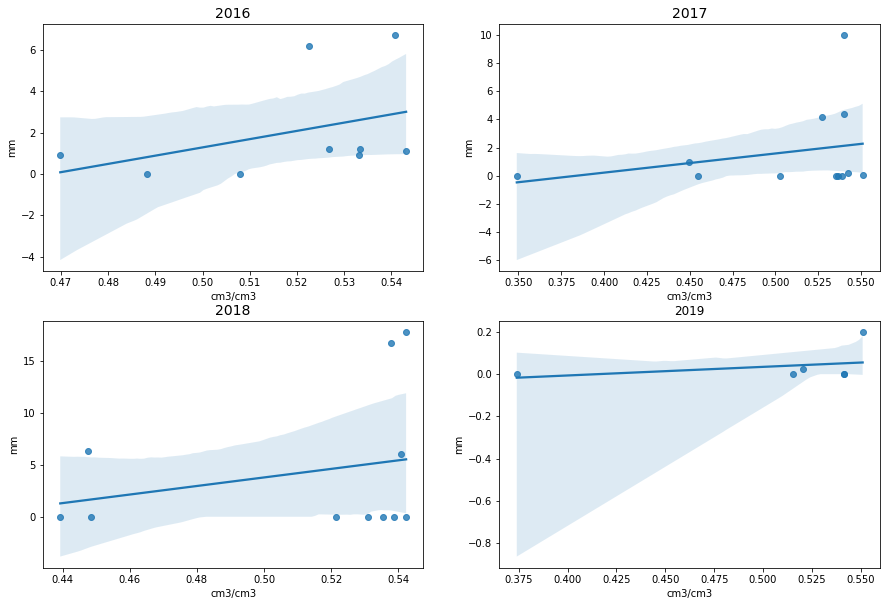

In [76]:
fig, axs = plt.subplots(ncols=2, nrows=2,figsize=(15,10))

axs1 = sns.regplot(data=merge16, x='Soil_Moisture', y='rain',ax=axs[0,0])
axs1.set_title('2016', fontdict={'fontsize':14})
axs1.set_xlabel('cm3/cm3', fontdict={'fontsize':10})
axs1.set_ylabel('mm', fontdict={'fontsize':10})
#axs1.set_yticks(np.arange(0,600,100))
axs1.tick_params(axis='both', labelsize=10)

axs2 = sns.regplot(data=merge17, x='Soil_Moisture', y='rain',ax=axs[0,1])
axs2.set_title('2017', fontdict={'fontsize':14})
axs2.set_xlabel('cm3/cm3', fontdict={'fontsize':10})
axs2.set_ylabel('mm', fontdict={'fontsize':10})
#axs2.set_yticks(np.arange(0,600,100))
axs2.tick_params(axis='both', labelsize=10)

axs3 = sns.regplot(data=merge18, x='Soil_Moisture', y='rain',ax=axs[1,0])
axs3.set_title('2018', fontdict={'fontsize':14})
axs3.set_xlabel('cm3/cm3', fontdict={'fontsize':10})
axs3.set_ylabel('mm', fontdict={'fontsize':10})
#axs3.set_yticks(np.arange(0,600,100))
axs3.tick_params(axis='both', labelsize=10)

axs4 = sns.regplot(data=merge19, x='Soil_Moisture', y='rain',ax=axs[1,1])
axs4.set_title('2019', fontdict={'fontsize':12})
axs4.set_xlabel('cm3/cm3', fontdict={'fontsize':10})
axs4.set_ylabel('mm', fontdict={'fontsize':10})
#axs4.set_yticks(np.arange(0,600,100))
axs4.tick_params(axis='both', labelsize=10)

plt.show()

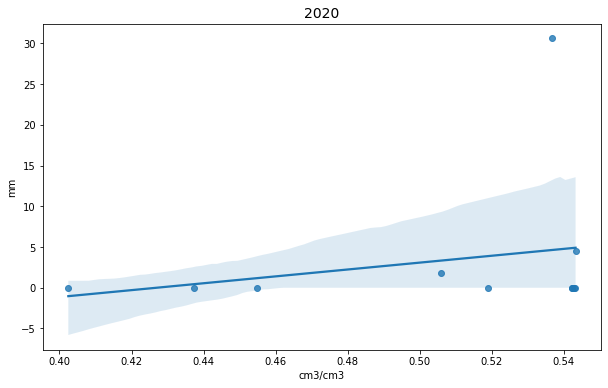

In [77]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.regplot(data=merge20, x='Soil_Moisture', y='rain',ax=ax)
ax.set_title('2020', fontdict={'fontsize':14})
ax.set_xlabel('cm3/cm3', fontdict={'fontsize':10})
ax.set_ylabel('mm', fontdict={'fontsize':10})
#axs4.set_yticks(np.arange(0,600,100))
ax.tick_params(axis='both', labelsize=10)
plt.show()

##### _**SENTINEL-SARAi**_

In [84]:
dfsent= sentinel.groupby([sentinel.Date.dt.strftime('%Y-%m-%d')]).mean().reset_index().drop(labels=['id'],axis=1)
dfsent.rename(
    columns={'date':'Date'},inplace=True
)
dfsent.Date = pd.to_datetime(dfsent.Date, format='%Y-%m-%d')
dfsarai= sarai_per_day.drop(labels=['Soil_1_Moist','Soil_2_Moist','Soil_3_Moist','Soil_4_Moist','Year','Month'],axis=1)
sent_sarai = pd.merge(dfsent,dfsarai, how='outer',on=['Date']).dropna(axis=0,how='any')
sent_sarai['Month'] = sent_sarai.Date.dt.strftime('%b')
#merge_sm_aws = pd.merge(soil_reg, df_aws, how='outer', on=['date']).dropna(axis=0,how='any')

In [86]:
sent_sarai16 = sent_sarai[sent_sarai.Year == 2016.0]
sent_sarai17 = sent_sarai[sent_sarai.Year == 2017.0]
sent_sarai18 = sent_sarai[sent_sarai.Year == 2018.0]
sent_sarai19 = sent_sarai[sent_sarai.Year == 2019.0]
sent_sarai20 = sent_sarai[sent_sarai.Year == 2020.0]
print('Rain')
print('2016: ',np.corrcoef(x=sent_sarai16.Soil_Moisture, y=sent_sarai16.Rain)[0][1])
print('2017: ',np.corrcoef(x=sent_sarai17.Soil_Moisture, y=sent_sarai17.Rain)[0][1])
print('2018: ',np.corrcoef(x=sent_sarai18.Soil_Moisture, y=sent_sarai18.Rain)[0][1])
print('2019: ',np.corrcoef(x=sent_sarai19.Soil_Moisture, y=sent_sarai19.Rain)[0][1])
print('2020: ',np.corrcoef(x=sent_sarai20.Soil_Moisture, y=sent_sarai20.Rain)[0][1])
print('\n')
print('Rain-Rate')
print('2016: ',np.corrcoef(x=sent_sarai16.Soil_Moisture, y=sent_sarai16.Rain_Rate)[0][1])
print('2017: ',np.corrcoef(x=sent_sarai17.Soil_Moisture, y=sent_sarai17.Rain_Rate)[0][1])
print('2018: ',np.corrcoef(x=sent_sarai18.Soil_Moisture, y=sent_sarai18.Rain_Rate)[0][1])
print('2019: ',np.corrcoef(x=sent_sarai19.Soil_Moisture, y=sent_sarai19.Rain_Rate)[0][1])
print('2020: ',np.corrcoef(x=sent_sarai20.Soil_Moisture, y=sent_sarai20.Rain_Rate)[0][1])

Rain
2016:  -0.04505863597578825
2017:  0.26981516842504444
2018:  -0.1570984859376146
2019:  -0.97907427537451
2020:  0.26016795345904314


Rain-Rate
2016:  0.2684109913848446
2017:  0.2825133039262718
2018:  0.1273179268552755
2019:  -0.9711069278468126
2020:  0.18550868911729745


##### _**Soil Moisture-Rain**_

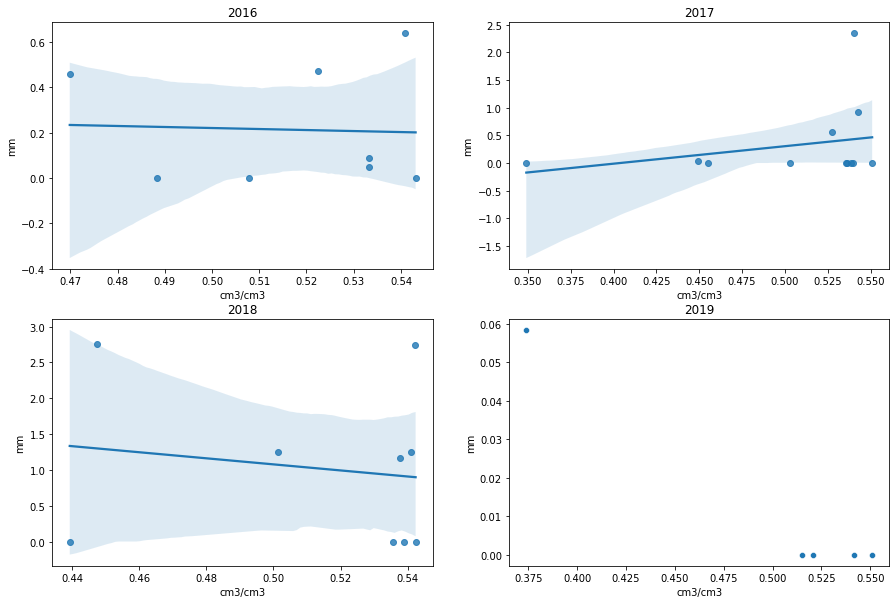

In [87]:
fig, axs = plt.subplots(ncols=2, nrows=2,figsize=(15,10))

axs1 = sns.regplot(data=sent_sarai16, x='Soil_Moisture', y='Rain',ax=axs[0,0])
axs1.set_title('2016', fontdict={'fontsize':12})
axs1.set_xlabel('cm3/cm3', fontdict={'fontsize':10})
axs1.set_ylabel('mm', fontdict={'fontsize':10})
#axs1.set_yticks(np.arange(0,600,100))
axs1.tick_params(axis='both', labelsize=10)

axs2 = sns.regplot(data=sent_sarai17, x='Soil_Moisture', y='Rain',ax=axs[0,1])
axs2.set_title('2017', fontdict={'fontsize':12})
axs2.set_xlabel('cm3/cm3', fontdict={'fontsize':10})
axs2.set_ylabel('mm', fontdict={'fontsize':10})
#axs2.set_yticks(np.arange(0,600,100))
axs2.tick_params(axis='both', labelsize=10)

axs3 = sns.regplot(data=sent_sarai18, x='Soil_Moisture', y='Rain',ax=axs[1,0])
axs3.set_title('2018', fontdict={'fontsize':12})
axs3.set_xlabel('cm3/cm3', fontdict={'fontsize':10})
axs3.set_ylabel('mm', fontdict={'fontsize':10})
#axs3.set_yticks(np.arange(0,600,100))
axs3.tick_params(axis='both', labelsize=10)

axs4 = sns.scatterplot(data=sent_sarai19, x='Soil_Moisture', y='Rain',ax=axs[1,1])
axs4.set_title('2019', fontdict={'fontsize':12})
axs4.set_xlabel('cm3/cm3', fontdict={'fontsize':10})
axs4.set_ylabel('mm', fontdict={'fontsize':10})
#axs4.set_yticks(np.arange(0,600,100))
axs4.tick_params(axis='both', labelsize=10)

plt.show()

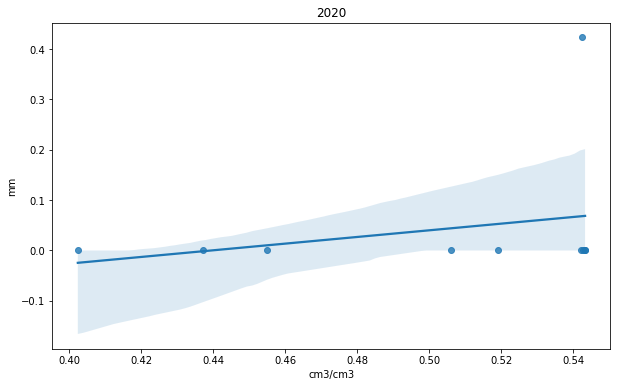

In [88]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.regplot(data=sent_sarai20, x='Soil_Moisture', y='Rain',ax=ax)
ax.set_title('2020', fontdict={'fontsize':12})
ax.set_xlabel('cm3/cm3', fontdict={'fontsize':10})
ax.set_ylabel('mm', fontdict={'fontsize':10})
#axs4.set_yticks(np.arange(0,600,100))
ax.tick_params(axis='both', labelsize=10)
plt.show()

##### _**Soil Moisture-Rain Rate**_

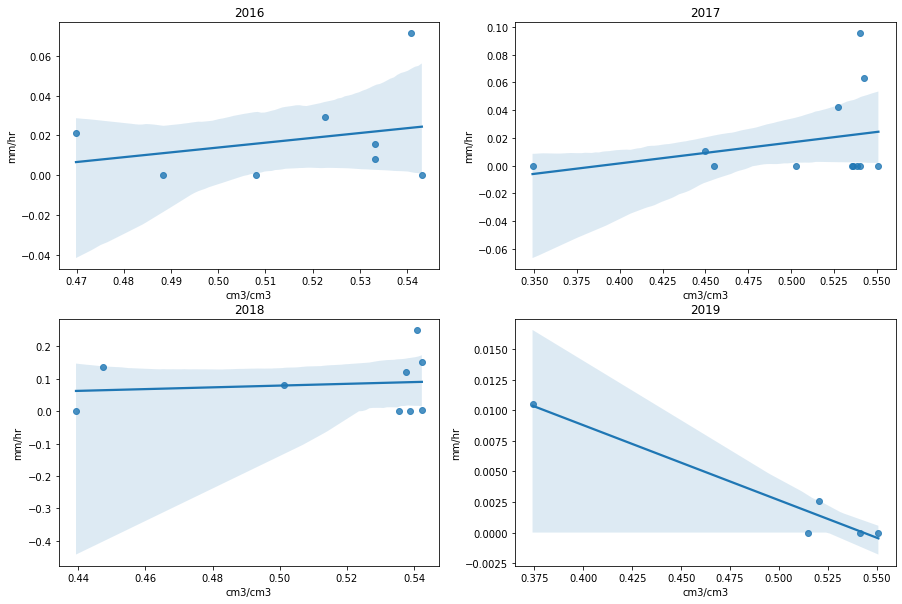

In [89]:
fig, axs = plt.subplots(ncols=2, nrows=2,figsize=(15,10))

axs1 = sns.regplot(data=sent_sarai16, x='Soil_Moisture', y='Rain_Rate',ax=axs[0,0])
axs1.set_title('2016', fontdict={'fontsize':12})
axs1.set_xlabel('cm3/cm3', fontdict={'fontsize':10})
axs1.set_ylabel('mm/hr', fontdict={'fontsize':10})
#axs1.set_yticks(np.arange(0,600,100))
axs1.tick_params(axis='both', labelsize=10)

axs2 = sns.regplot(data=sent_sarai17, x='Soil_Moisture', y='Rain_Rate',ax=axs[0,1])
axs2.set_title('2017', fontdict={'fontsize':12})
axs2.set_xlabel('cm3/cm3', fontdict={'fontsize':10})
axs2.set_ylabel('mm/hr', fontdict={'fontsize':10})
#axs2.set_yticks(np.arange(0,600,100))
axs2.tick_params(axis='both', labelsize=10)

axs3 = sns.regplot(data=sent_sarai18, x='Soil_Moisture', y='Rain_Rate',ax=axs[1,0])
axs3.set_title('2018', fontdict={'fontsize':12})
axs3.set_xlabel('cm3/cm3', fontdict={'fontsize':10})
axs3.set_ylabel('mm/hr', fontdict={'fontsize':10})
#axs3.set_yticks(np.arange(0,600,100))
axs3.tick_params(axis='both', labelsize=10)

axs4 = sns.regplot(data=sent_sarai19, x='Soil_Moisture', y='Rain_Rate',ax=axs[1,1])
axs4.set_title('2019', fontdict={'fontsize':12})
axs4.set_xlabel('cm3/cm3', fontdict={'fontsize':10})
axs4.set_ylabel('mm/hr', fontdict={'fontsize':10})
#axs4.set_yticks(np.arange(0,600,100))
axs4.tick_params(axis='both', labelsize=10)

plt.show()

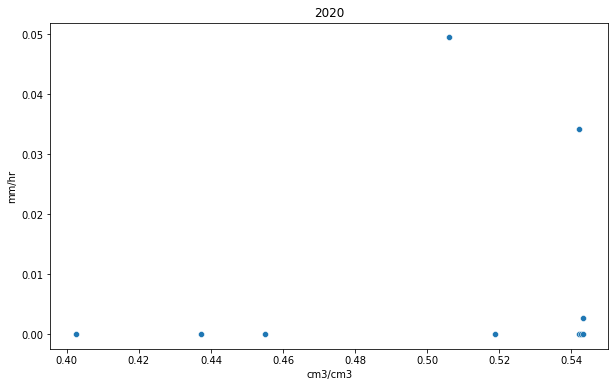

In [90]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.scatterplot(data=sent_sarai20, x='Soil_Moisture', y='Rain_Rate',ax=ax)
ax.set_title('2020', fontdict={'fontsize':12})
ax.set_xlabel('cm3/cm3', fontdict={'fontsize':10})
ax.set_ylabel('mm/hr', fontdict={'fontsize':10})
#axs4.set_yticks(np.arange(0,600,100))
ax.tick_params(axis='both', labelsize=10)
plt.show()

##### _**SARAi**_

In [110]:
sarai16 = sarai[sarai.Date.dt.year == 2016].dropna(axis=0, how='any')
sarai17 = sarai[sarai.Date.dt.year == 2017].dropna(axis=0, how='any')
sarai18 = sarai[sarai.Date.dt.year == 2018].dropna(axis=0, how='any')
sarai19 = sarai[sarai.Date.dt.year == 2019].dropna(axis=0, how='any')
sarai20 = sarai[sarai.Date.dt.year == 2020].dropna(axis=0, how='any')

print('Rain-Soil_1_Moist')
print('2016: ',np.corrcoef(x=sarai16.Soil_1_Moist, y=sarai16.Rain)[0][1])
print('2017: ',np.corrcoef(x=sarai17.Soil_1_Moist, y=sarai17.Rain)[0][1])
print('2018: ',np.corrcoef(x=sarai18.Soil_1_Moist, y=sarai18.Rain)[0][1])
print('2019: ',np.corrcoef(x=sarai19.Soil_1_Moist, y=sarai19.Rain)[0][1])
print('2020: ',np.corrcoef(x=sarai20.Soil_1_Moist, y=sarai20.Rain)[0][1])
print('Rain-Soil_2_Moist')
print('2016: ',np.corrcoef(x=sarai16.Soil_2_Moist, y=sarai16.Rain)[0][1])
print('2017: ',np.corrcoef(x=sarai17.Soil_2_Moist, y=sarai17.Rain)[0][1])
print('2018: ',np.corrcoef(x=sarai18.Soil_2_Moist, y=sarai18.Rain)[0][1])
print('2019: ',np.corrcoef(x=sarai19.Soil_2_Moist, y=sarai19.Rain)[0][1])
print('2020: ',np.corrcoef(x=sarai20.Soil_2_Moist, y=sarai20.Rain)[0][1])
print('Rain-Soil_3_Moist')
print('2016: ',np.corrcoef(x=sarai16.Soil_3_Moist, y=sarai16.Rain)[0][1])
print('2017: ',np.corrcoef(x=sarai17.Soil_3_Moist, y=sarai17.Rain)[0][1])
print('2018: ',np.corrcoef(x=sarai18.Soil_3_Moist, y=sarai18.Rain)[0][1])
print('2019: ',np.corrcoef(x=sarai19.Soil_3_Moist, y=sarai19.Rain)[0][1])
print('2020: ',np.corrcoef(x=sarai20.Soil_3_Moist, y=sarai20.Rain)[0][1])
print('Rain-Soil_4_Moist')
print('2016: ',np.corrcoef(x=sarai16.Soil_4_Moist, y=sarai16.Rain)[0][1])
print('2017: ',np.corrcoef(x=sarai17.Soil_4_Moist, y=sarai17.Rain)[0][1])
print('2018: ',np.corrcoef(x=sarai18.Soil_4_Moist, y=sarai18.Rain)[0][1])
print('2019: ',np.corrcoef(x=sarai19.Soil_4_Moist, y=sarai19.Rain)[0][1])
print('2020: ',np.corrcoef(x=sarai20.Soil_4_Moist, y=sarai20.Rain)[0][1])

Rain-Soil_1_Moist
2016:  nan
2017:  -0.015526947287402032
2018:  -0.00523657677575045
2019:  -0.012251788709343403
2020:  -0.001651145860099815
Rain-Soil_2_Moist
2016:  nan
2017:  0.07817590831278916
2018:  -0.005205999381199102
2019:  nan
2020:  -0.0017444866544279853
Rain-Soil_3_Moist
2016:  nan
2017:  nan
2018:  -0.005205999381199102
2019:  nan
2020:  -0.0034905845534833686
Rain-Soil_4_Moist
2016:  nan
2017:  nan
2018:  -0.005205999381199102
2019:  nan
2020:  -0.045045137454876746


In [111]:
print('Rain_Rate-Soil_1_Moist')
print('2016: ',np.corrcoef(x=sarai16.Soil_1_Moist, y=sarai16.Rain_Rate)[0][1])
print('2017: ',np.corrcoef(x=sarai17.Soil_1_Moist, y=sarai17.Rain_Rate)[0][1])
print('2018: ',np.corrcoef(x=sarai18.Soil_1_Moist, y=sarai18.Rain_Rate)[0][1])
print('2019: ',np.corrcoef(x=sarai19.Soil_1_Moist, y=sarai19.Rain_Rate)[0][1])
print('2020: ',np.corrcoef(x=sarai20.Soil_1_Moist, y=sarai20.Rain_Rate)[0][1])
print('Rain_Rate-Soil_2_Moist')
print('2016: ',np.corrcoef(x=sarai16.Soil_2_Moist, y=sarai16.Rain_Rate)[0][1])
print('2017: ',np.corrcoef(x=sarai17.Soil_2_Moist, y=sarai17.Rain_Rate)[0][1])
print('2018: ',np.corrcoef(x=sarai18.Soil_2_Moist, y=sarai18.Rain_Rate)[0][1])
print('2019: ',np.corrcoef(x=sarai19.Soil_2_Moist, y=sarai19.Rain_Rate)[0][1])
print('2020: ',np.corrcoef(x=sarai20.Soil_2_Moist, y=sarai20.Rain_Rate)[0][1])
print('Rain_Rate-Soil_3_Moist')
print('2016: ',np.corrcoef(x=sarai16.Soil_3_Moist, y=sarai16.Rain_Rate)[0][1])
print('2017: ',np.corrcoef(x=sarai17.Soil_3_Moist, y=sarai17.Rain_Rate)[0][1])
print('2018: ',np.corrcoef(x=sarai18.Soil_3_Moist, y=sarai18.Rain_Rate)[0][1])
print('2019: ',np.corrcoef(x=sarai19.Soil_3_Moist, y=sarai19.Rain_Rate)[0][1])
print('2020: ',np.corrcoef(x=sarai20.Soil_3_Moist, y=sarai20.Rain_Rate)[0][1])
print('Rain_Rate-Soil_4_Moist')
print('2016: ',np.corrcoef(x=sarai16.Soil_4_Moist, y=sarai16.Rain_Rate)[0][1])
print('2017: ',np.corrcoef(x=sarai17.Soil_4_Moist, y=sarai17.Rain_Rate)[0][1])
print('2018: ',np.corrcoef(x=sarai18.Soil_4_Moist, y=sarai18.Rain_Rate)[0][1])
print('2019: ',np.corrcoef(x=sarai19.Soil_4_Moist, y=sarai19.Rain_Rate)[0][1])
print('2020: ',np.corrcoef(x=sarai20.Soil_4_Moist, y=sarai20.Rain_Rate)[0][1])

Rain_Rate-Soil_1_Moist
2016:  nan
2017:  -0.017624505191583255
2018:  -0.005571900677590096
2019:  -0.011788128539186342
2020:  -0.0021373547054842432
Rain_Rate-Soil_2_Moist
2016:  nan
2017:  0.08484347137734317
2018:  -0.005531444537652557
2019:  nan
2020:  0.0018884540870094115
Rain_Rate-Soil_3_Moist
2016:  nan
2017:  nan
2018:  -0.005531444537652557
2019:  nan
2020:  -0.003642741177385935
Rain_Rate-Soil_4_Moist
2016:  nan
2017:  nan
2018:  -0.005531444537652557
2019:  nan
2020:  -0.04912261474111671


##### _**Soil (1-4)-Rain**_

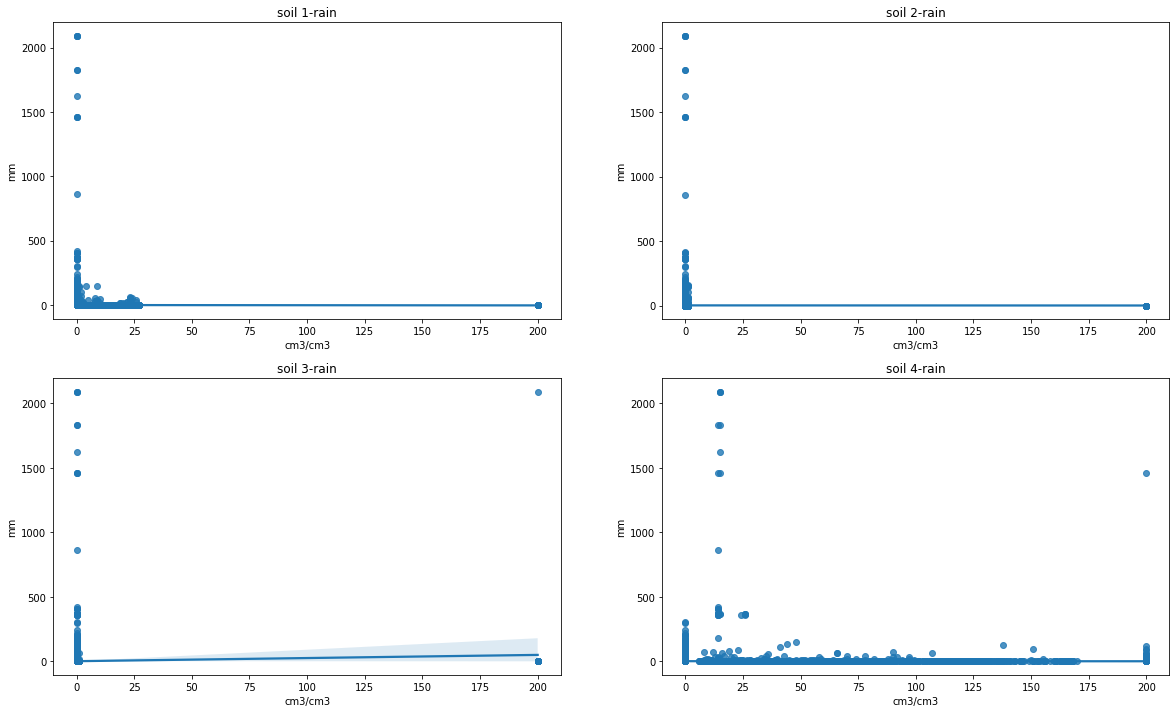

In [92]:
fig, axs = plt.subplots(ncols=2, nrows=2,figsize=(20,12))

axs1 = sns.regplot(data=sarai, x='Soil_1_Moist', y='Rain',ax=axs[0,0])
axs1.set_title('soil 1-rain', fontdict={'fontsize':12})
axs1.set_xlabel('cm3/cm3', fontdict={'fontsize':10})
axs1.set_ylabel('mm', fontdict={'fontsize':10})
#axs1.set_yticks(np.arange(0,600,100))
axs1.tick_params(axis='both', labelsize=10)

axs2 = sns.regplot(data=sarai, x='Soil_2_Moist', y='Rain',ax=axs[0,1])
axs2.set_title('soil 2-rain', fontdict={'fontsize':12})
axs2.set_xlabel('cm3/cm3', fontdict={'fontsize':10})
axs2.set_ylabel('mm', fontdict={'fontsize':10})
#axs2.set_yticks(np.arange(0,600,100))
axs2.tick_params(axis='both', labelsize=10)

axs3 = sns.regplot(data=sarai, x='Soil_3_Moist', y='Rain',ax=axs[1,0])
axs3.set_title('soil 3-rain', fontdict={'fontsize':12})
axs3.set_xlabel('cm3/cm3', fontdict={'fontsize':10})
axs3.set_ylabel('mm', fontdict={'fontsize':10})
#axs3.set_yticks(np.arange(0,600,100))
axs3.tick_params(axis='both', labelsize=10)

axs4 = sns.regplot(data=sarai, x='Soil_4_Moist', y='Rain',ax=axs[1,1])
axs4.set_title('soil 4-rain', fontdict={'fontsize':12})
axs4.set_xlabel('cm3/cm3', fontdict={'fontsize':10})
axs4.set_ylabel('mm', fontdict={'fontsize':10})
#axs4.set_yticks(np.arange(0,600,100))
axs4.tick_params(axis='both', labelsize=10)

plt.show()

##### _**Soil-Rain Rate**_

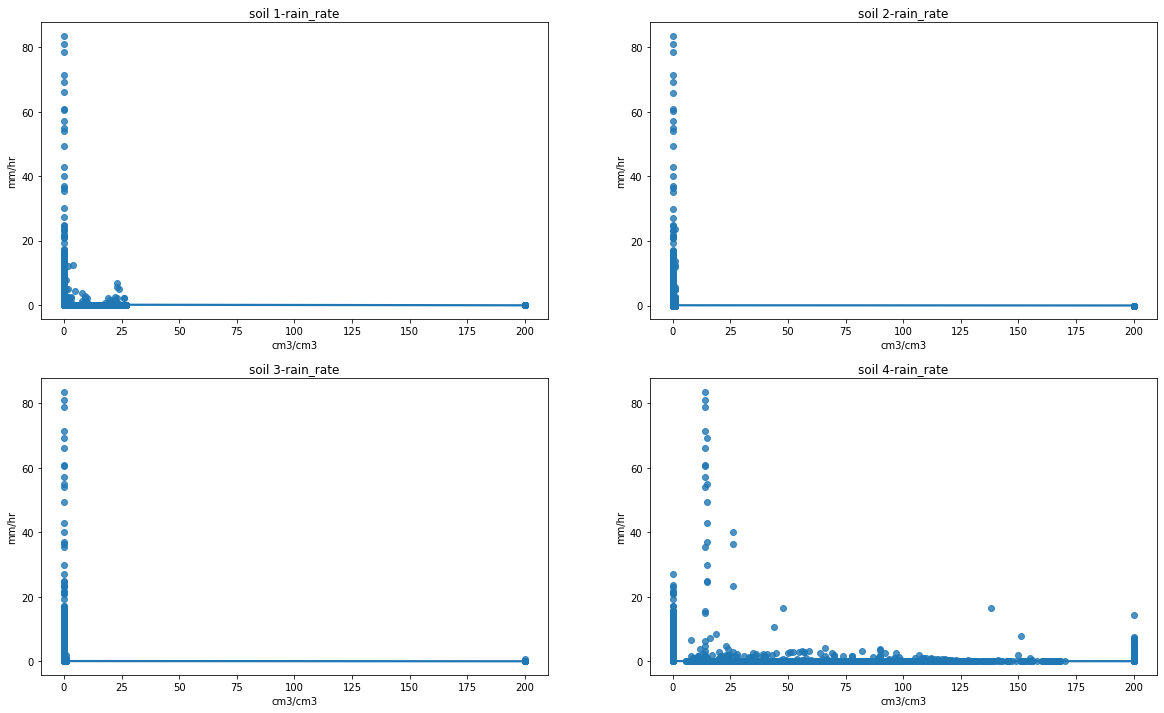

In [113]:
fig, axs = plt.subplots(ncols=2, nrows=2,figsize=(20,12))

axs1 = sns.regplot(data=sarai, x='Soil_1_Moist', y='Rain_Rate', ax=axs[0,0])
axs1.set_title('soil 1-rain_rate', fontdict={'fontsize':12})
axs1.set_xlabel('cm3/cm3', fontdict={'fontsize':10})
axs1.set_ylabel('mm/hr', fontdict={'fontsize':10})
#axs1.set_yticks(np.arange(0,600,100))
axs1.tick_params(axis='both', labelsize=10)

axs2 = sns.regplot(data=sarai, x='Soil_2_Moist', y='Rain_Rate',ax=axs[0,1])
axs2.set_title('soil 2-rain_rate', fontdict={'fontsize':12})
axs2.set_xlabel('cm3/cm3', fontdict={'fontsize':10})
axs2.set_ylabel('mm/hr', fontdict={'fontsize':10})
#axs2.set_yticks(np.arange(0,600,100))
axs2.tick_params(axis='both', labelsize=10)

axs3 = sns.regplot(data=sarai, x='Soil_3_Moist', y='Rain_Rate',ax=axs[1,0])
axs3.set_title('soil 3-rain_rate', fontdict={'fontsize':12})
axs3.set_xlabel('cm3/cm3', fontdict={'fontsize':10})
axs3.set_ylabel('mm/hr', fontdict={'fontsize':10})
#axs3.set_yticks(np.arange(0,600,100))
axs3.tick_params(axis='both', labelsize=10)

axs4 = sns.regplot(data=sarai, x='Soil_4_Moist', y='Rain_Rate',ax=axs[1,1])
axs4.set_title('soil 4-rain_rate', fontdict={'fontsize':12})
axs4.set_xlabel('cm3/cm3', fontdict={'fontsize':10})
axs4.set_ylabel('mm/hr', fontdict={'fontsize':10})
#axs4.set_yticks(np.arange(0,600,100))
axs4.tick_params(axis='both', labelsize=10)

plt.show()